#Exploratory Data Analysis

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Importing the packages](#section102)<br/>
- 2. [Data Loading and Description](#section2)</br>
    - 2.1 [Loading Data](#dection201)</br>
- 3. [Data profiling](#section3)</br>
    - 3.1 [Data Pre-profiling](#section301)<br/>
    - 3.2 [Observations](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post profiling](#section304)<br/>
- 4. [Questions](#section6)</br>
     - 4.1 [Which brand cars are mostly sold? ](#section601)<br/>
     - 4.2 [Which body type is mostly sold?](#section602)<br/>
     - 4.3 [Percentage of drive types sold?](#section603)<br/>
     - 4.4 [Which body and drive type are sold most?](#section604)<br/>
     - 4.5 [Which price group are having more demand?](#section605)<br/>
     - 4.6 [How the body of the car and price related to each other?](#section606)<br/>
     - 4.7 [ Does the cars have registered?](#section607)<br/>
     - 4.8 [ How does top 10 cars relate to registration?](#section608)<br/>
     - 4.9 [How does year relate to registration of cars?](#section609)<br/>
     - 4.10 [How the price and mileage relate to each other?](#section610)<br/>
     - 4.11 [How does top 10 car sales relate to engine type?](#section611)<br/>
     - 4.12 [What is the rate of increase in car sales over years with engine type?](#section612)<br/>
     - 4.13 [How is the relationship between different varaints of data?](#section613)<br/>
     - 4.14 [Correlation between all the features in heat map?.](#section614)<br/>
- 5. [Hypothesis: Sales for diesel variant cars likely to increase every year ](#section5)<br/>
- 6. [Conclusion](#section6)<br/>

<a id=section1></a>
#1. Problem Statement

This dataset is from a 2016 car sale values that measures the increasing car sales and fuel variant every year.

<a id=section101></a>
##1.1 Introduction

Exploratory Data Analysis (EDA) is critical part in data analysis  for below reasons. Before EDA starts we have do clean the data for any missing, duplicate or zeros values etc..


*   Determining relationships in Data.
*   Checking for assumptions.

*   Detection of mistakes
*   Finding patterns in data





<a id=section102></a>
###1.2 Importing the packages

In [0]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline

<a id=section2></a>
#2. Data Loading and Description 

The dataset consists of the information about multiple brands, Various variables present in the dataset includes Car brand, price, body, milage etc.

The dataset comprises of 9576 observations of 10 columns. Below is a table showing names of all the columns and their description.


                                                                       






                                *  car: manufacturer brand
                                *  price: seller’s price of car (in USD)
                                *  body: car body type
                                *  mileage: in kilometers (‘000 Km)
                                *  engV: rounded engine volume (‘000 cubic cm)
                                *  engType: type of fuel (“Other” in this case should be treated as NA)
                                *  registration: whether car registered or not
                                *  year: year of production
                                *  model: specific model name
                                *  drive: drive type














<a id=section201></a>
##2.1 Loading Data

In [0]:
sales = pd.read_csv("car_sales.csv",encoding="latin-1")
sales.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


<a id=section3></a>
#3. Data profiling

<a id=section301></a>
## 3.1 Data Pre-profilling

In [0]:
salesprofile = pandas_profiling.ProfileReport(sales)
salesprofile.to_file(outputfile="car_sales_pre_profiling.html")

Processed data with pandas profiling and the data set have following anamolies. 




1.   drive has 511 / 5.3% missing values Missing
2.   engV has 434 / 4.5% missing values Missing
3.   mileage has 348 / 3.6% zeros Zeros
4.   price has 267 / 2.8% zeros Zeros
5.   Dataset has 113 duplicate rows Warning








<a id=section302></a>
##3.2 Observations

Variables transform prior to analysis



*   Drop the duplicate rows.
*   Replace missing values with mean for column engV.
*   Replace zeros with mean for columns mileage and price.
*   Drop the missing values of column drive.



<a id=section303></a>
##3.3 Preprocessing

Dataset have around 113 duplicate records.

In [0]:
sales[sales.duplicated()].count()

car             113
price           113
body            113
mileage         113
engV            113
engType         113
registration    113
year            113
model           113
drive           112
dtype: int64

In [0]:
sales.loc[sales.duplicated(keep='first'),:]
sales.drop_duplicates(keep='first',inplace=True)
sales[sales.duplicated()]

,car,price,body,mileage,engV,engType,registration,year,model,drive


Duplicate rows does give wrong results, Hence duplicate rows have been dropped.

Drive column has around 511 missing values.

In [0]:
sales.dropna(subset=['drive'],inplace=True)

While dealing with null values of drive column, not able to find the group by combination to replace blank values with mode.

Due to this, we have directly drop the blank values of drive.

Dealing with zeros in price.
Price column has 267 missing values.

Replacing zeros of price with NaN first and group by "car", "year", "body" and "engType" columns and replace NaN with mean.


In [0]:
sales.loc[sales[sales['price'] <= 0].index,'price'] = np.NaN
IndexedSales = sales.set_index(['car','year','body','engType']).sort_index()
groupedSales = IndexedSales.groupby(level=['car','year','body','engType'])['price'].mean()
IndexedSales['price'].fillna(groupedSales,inplace=True)
IndexedSales

price  mileage  engV registration  \
car          year body      engType                                           
Acura        2005 crossover Petrol    11111.000      199   3.5          yes   
                  sedan     Gas        8699.000      144   3.2          yes   
                            Gas        8699.000      145   3.2          yes   
                            Gas        8700.000      145   3.2          yes   
                            Petrol     8550.000      145   3.2          yes   
             2006 sedan     Gas       12900.000      126   3.5          yes   
             2008 crossover Petrol    15650.000      170   3.7          yes   
                            Petrol    17200.000       82   3.7          yes   
                            Petrol    18500.000       85   3.7          yes   
                  sedan     Gas       15000.000      150   3.5          yes   
             2010 crossover Other     30999.000       32   3.7          yes   
             2014 crossover Petrol    46999.000       30   3.5          yes   
             2015 sedan     Petrol    38200.000        4   2.4          yes   
Alfa Romeo   1991 hatch     Gas        1800.000      185   1.7          yes   
                  sedan     Petrol     2300.000      122   1.6          yes   
             2000 sedan     Petrol     2300.000       94   1.8           no   
             2002 hatch     Petrol     5900.000      199   1.6          yes   
             2003 vagon     Diesel     2350.000      230   1.9           no   
             2008 sedan     Petrol    12100.000       91   2.2          yes   
                            Petrol    12000.000      150   2.2          yes   
                            Petrol    11900.000      156   2.2          yes   
             2009 sedan     Petrol    15300.000       62   2.2          yes   
             2012 hatch     Petrol    15999.000       60   1.4          yes   
                            Petrol    17500.000      800   1.4          yes   
Aro          1992 crossover Petrol     3600.000       43   1.4          yes   
Aston Martin 2006 other     Petrol    65000.000       37   6.0          yes   
             2011 sedan     Petrol   125000.000       12   6.0          yes   
             2012 sedan     Petrol   125000.000       18   6.0          yes   
Audi         1980 sedan     Petrol      600.000      112   1.6          yes   
             1985 sedan     Petrol     1852.500      150   1.8          yes   
...                                         ...      ...   ...          ...   
ZAZ          2012 sedan     Gas        5200.000       53   1.5          yes   
                            Petrol     3700.000       65   1.3          yes   
             2013 hatch     Gas        5900.000       75   1.5          yes   
                            Petrol     6650.000       44   1.5          yes   
                  sedan     Gas        6900.000       52   1.5          yes   
                            Gas        5800.000       46   1.5          yes   
                            Gas        5400.000       20   1.5          yes   
                            Petrol     7000.000       30   1.5          yes   
                            Petrol     5400.000       20   1.5          yes   
                            Petrol     5500.000       60   1.5          yes   
                            Petrol     8200.000       70   1.4          yes   
             2014 hatch     Petrol     6880.000       25   1.5          yes   
                  sedan     Other      7898.319        3   1.5          yes   
                            Petrol     5700.000        8   1.5          yes   
                            Petrol     5950.000       76   1.5          yes   
             2015 hatch     Petrol     5950.000       12   1.5          yes   
                            Petrol     7039.500        1   1.5          yes   
                            Petrol     6500.000        1   1.5          yes   
             

In [0]:
sales = IndexedSales.reset_index()
sales.dropna(subset=['price'],inplace=True)
sales[sales['price'].isnull()]

,car,year,body,engType,price,mileage,engV,registration,model,drive


From the above output we can see that, now price column does not have any null value

*  Dealing with missing values
*   Replacing null values of price column with mean value of price column


*   There are some NaN which are not falling under this group. Hence drop those values.





engV column has 434 missing values.

First replace missing values with NaN and then group by "car", "body", "engType" with mean.

In [0]:
sales.loc[sales[(sales['engV'] <= 0.8)| (sales['engV'] >= 10)].index,'engV']=np.NaN
IndexedEngVolume = sales.set_index(['car','body','engType']).sort_index()
groupedEngVolume = IndexedEngVolume.groupby(['car','body','engType'])['engV'].mean()
IndexedEngVolume['engV'].fillna(groupedEngVolume,inplace=True)
IndexedEngVolume

year       price  mileage  engV registration  \
car          body      engType                                                 
Acura        crossover Other    2010   30999.000       32  3.70          yes   
                       Petrol   2005   11111.000      199  3.50          yes   
                       Petrol   2008   15650.000      170  3.70          yes   
                       Petrol   2008   17200.000       82  3.70          yes   
                       Petrol   2008   18500.000       85  3.70          yes   
                       Petrol   2014   46999.000       30  3.50          yes   
             sedan     Gas      2005    8699.000      144  3.20          yes   
                       Gas      2005    8699.000      145  3.20          yes   
                       Gas      2005    8700.000      145  3.20          yes   
                       Gas      2006   12900.000      126  3.50          yes   
                       Gas      2008   15000.000      150  3.50          yes   
                       Petrol   2005    8550.000      145  3.20          yes   
                       Petrol   2015   38200.000        4  2.40          yes   
Alfa Romeo   hatch     Gas      1991    1800.000      185  1.70          yes   
                       Petrol   2002    5900.000      199  1.60          yes   
                       Petrol   2012   15999.000       60  1.40          yes   
                       Petrol   2012   17500.000      800  1.40          yes   
             sedan     Petrol   1991    2300.000      122  1.60          yes   
                       Petrol   2000    2300.000       94  1.80           no   
                       Petrol   2008   12100.000       91  2.20          yes   
                       Petrol   2008   12000.000      150  2.20          yes   
                       Petrol   2008   11900.000      156  2.20          yes   
                       Petrol   2009   15300.000       62  2.20          yes   
             vagon     Diesel   2003    2350.000      230  1.90           no   
Aro          crossover Petrol   1992    3600.000       43  1.40          yes   
Aston Martin other     Petrol   2006   65000.000       37  6.00          yes   
             sedan     Petrol   2011  125000.000       12  6.00          yes   
                       Petrol   2012  125000.000       18  6.00          yes   
Audi         crossover Diesel   2003    4999.000      242  2.50           no   
                       Diesel   2005   11400.000      250  2.50          yes   
...                              ...         ...      ...   ...          ...   
ZAZ          sedan     Petrol   2005    1950.000       67  1.20          yes   
                       Petrol   2005    2200.000       71  1.20          yes   
                       Petrol   2005    1750.000      100  1.20          yes   
                       Petrol   2006    2800.000       25  1.20          yes   
                       Petrol   2006    2100.000       68  1.20          yes   
                       Petrol   2007    2100.000       82  1.20          yes   
                       Petrol   2007    2300.000      126  1.20          yes   
                       Petrol   2008    1900.000       16  1.30          yes   
                       Petrol   2008    2350.000       85  1.20          yes   
                       Petrol   2008    1800.000      120  1.20          yes   
                       Petrol   2008    2300.000       75  1.20          yes   
                       Petrol   2012    3700.000       65  1.30          yes   
                       Petrol   2013    7000.000       30  1.50          yes   
                       Petrol   2013    5400.000       20  1.50          yes   
                       Petrol   2013    5500.000       60  1.50          yes   
                       Petrol   2013    8200.000       70  1.40          yes   
                       Petrol   2014    5700.000        8  1.50          yes   
                       Petrol   

In [0]:
sales = IndexedEngVolume.reset_index()
sales.dropna(subset=['engV'],inplace=True)
sales[sales['engV'].isnull()]

,car,body,engType,year,price,mileage,engV,registration,model,drive


From above, we can say there are no null values in engV column.

All the null values are replaced with mean of group by "car", "body", "engType" values.

Mileage column has 348 zeros.

In [0]:
sales.loc[sales[sales['mileage'] <= 0].index,'mileage'] = np.NaN
IndexedMileage = sales.set_index(['engV','engType','drive']).sort_index()
GroupedMileage = IndexedMileage.groupby(['engV','engType','drive'])['mileage'].mean()
IndexedMileage['mileage'].fillna(GroupedMileage,inplace=True)
IndexedMileage

car       body  year         price     mileage  \
engV engType drive                                                             
0.90 Gas     front           Fiat      hatch  1995    1300.00000  178.000000   
     Petrol  front           Ford      hatch  2013   12500.00000   50.000000   
             rear           Smart      hatch  2016   21091.34235         NaN   
1.00 Diesel  front        Renault      vagon  2006    2650.00000    1.000000   
             front        Renault        van  2013    7600.00000  108.000000   
     Gas     front           Opel      hatch  1990    3100.00000  245.000000   
             front           Opel      hatch  2000    2754.00000  297.000000   
             front           Opel      vagon  2001    3799.00000  251.000000   
             front         Suzuki      hatch  1999    3100.00000  140.000000   
             front         Toyota      hatch  2011    7900.00000   56.000000   
     Other   front         Nissan      hatch  2013   14999.00000   31.000000   
             front          Smart      other  2013   14450.00000   27.000000   
             front          Tesla      sedan  2013   80000.00000   27.000000   
             front          Tesla      sedan  2013   58000.00000    8.000000   
             front     Volkswagen        van  2004    7000.00000  350.000000   
             full           Tesla      sedan  2015  139600.00000    4.000000   
             full           Tesla      sedan  2015   99000.00000   15.000000   
             full           Tesla      sedan  2016  159600.00000    6.666667   
             full           Tesla      sedan  2016   85500.00000    1.000000   
             full           Tesla      sedan  2016  162900.00000    6.666667   
             rear           Smart      other  2005    5500.00000  130.000000   
             rear           Smart      other  2012    7590.00000   61.000000   
             rear           Smart      other  2014   19999.00000    1.000000   
             rear           Tesla      sedan  2013   59000.00000   30.000000   
             rear           Tesla      sedan  2013   61900.00000   22.000000   
             rear           Tesla      sedan  2013   59000.00000   20.000000   
             rear           Tesla      sedan  2013   64900.00000   23.000000   
             rear           Tesla      sedan  2013   54000.00000   49.000000   
             rear           Tesla      sedan  2014   60000.00000    5.000000   
             rear           Tesla      sedan  2014   56000.00000    9.000000   
...                           ...        ...   ...           ...         ...   
6.20 Petrol  full   Mercedes-Benz  crossover  2008   21500.00000  148.000000   
             rear       Chevrolet      other  2011   75000.00000   10.000000   
             rear   Mercedes-Benz      other  2008   39900.00000   88.000000   
6.30 Petrol  full            Audi      sedan  2012   72000.00000   55.000000   
             full            Audi      sedan  2012   68500.00000   44.000000   
             full            Audi      sedan  2013   73500.00000   53.000000   
             full            Audi      sedan  2013   36300.00000   60.000000   
             full   Mercedes-Benz  crossover  2007   21300.00000  190.000000   
             full   Mercedes-Benz  crossover  2007   27500.00000  152.000000   
             full   Mercedes-Benz  crossover  2013  219900.00000   30.000000   
             full   Mercedes-Benz  crossover  2016  222000.00000   87.875000   
             full   Mercedes-Benz      other  2008   40000.00000  119.000000   
             rear   Mercedes-Benz      other  2007   74900.00000   32.000000   
             rear   Mercedes-Benz      other  2009   51500.00000   75.000000   
             rear   Mercedes-Benz      sedan  2007   39900.00000   29.000000   
             rear   Mercedes-Benz      sedan  2008   30500.00000   89.000000   
             rear   Mercedes-Benz      sedan  2010   56800.00000   74.000000   
6.50 Petrol  rear   Mercedes-B

In [0]:
sales = IndexedMileage.reset_index()
sales.dropna(subset=['mileage'],inplace=True)
sales[sales['mileage'].isnull()]

,engV,engType,drive,car,body,year,price,mileage,registration,model


From the above output we can see that, now mileage column does not have any null value

*   Dealing with missing values
*   Replacing null values of mileage column with mean value of mileage column.



<a id=section304></a>
##3.4 Post Profilling

In [0]:
salesprofile = pandas_profiling.ProfileReport(sales)
salesprofile.to_file(outputfile="car_sales_post_profiling.html")

We have processed the data and now the dataset doesn't give any missing values, duplicate entries and zeros. So, pandas profiling after preprocessing will give more insights.

<a id=section4></a>
#4. Questions

<a id=section401></a>
##4.1 Which brand cars are mostly sold?

Text(0, 0.5, 'Count')

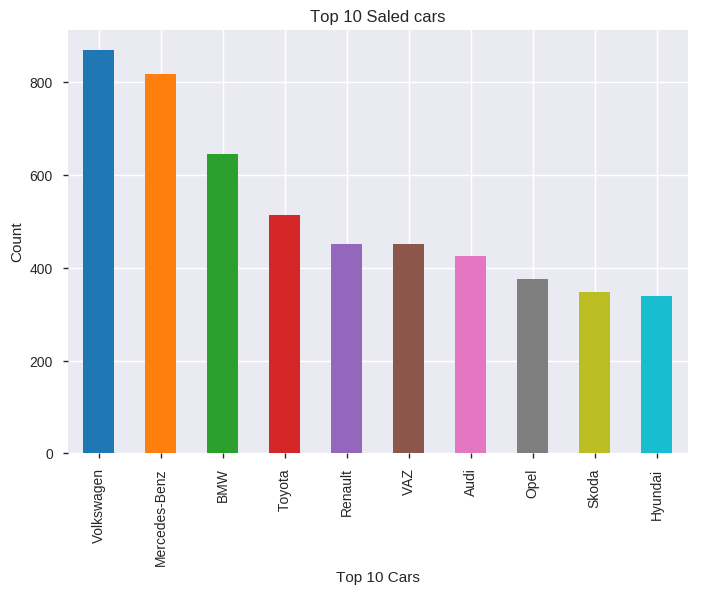

In [0]:
barPlot = sales['car'].value_counts().head(10).plot.bar()
matplotlib.pyplot.title("Top 10 Saled cars")
matplotlib.pyplot.xlabel("Top 10 Cars")
matplotlib.pyplot.ylabel("Count")



*   **Volkswagen** is highly sold in all the categories.
*   **Mercedes-Benz** is second highest sold car brand.



<a id=section402></a>
##4.2 Which body type is mostly sold?

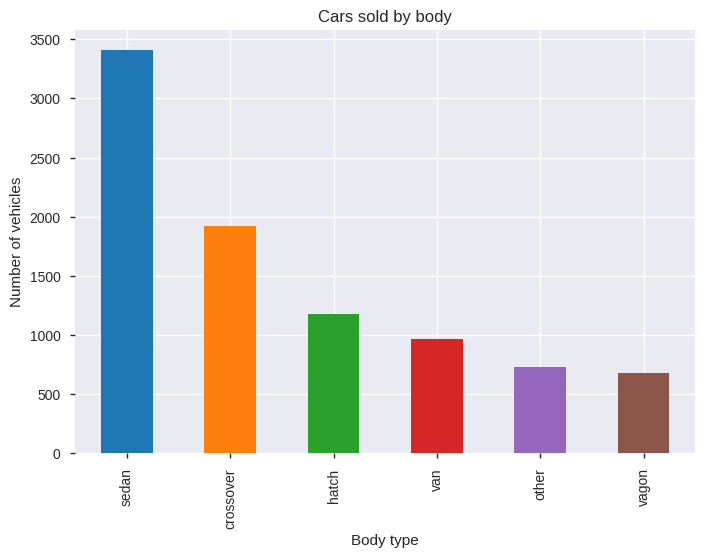

In [0]:
sales['body'].value_counts().plot.bar()
sns.plt.title("Cars sold by body")
sns.plt.ylabel('Number of vehicles')
sns.plt.xlabel('Body type');



We can say most sold car is body type  "**Sedan**". It is very comfortable for small family and within low budget. So it is most preferrable car by the people.



<a id=section403></a>
##4.3 Percentage of drive types sold?

Text(0.5, 1.0, 'Pie diagram for drive type')

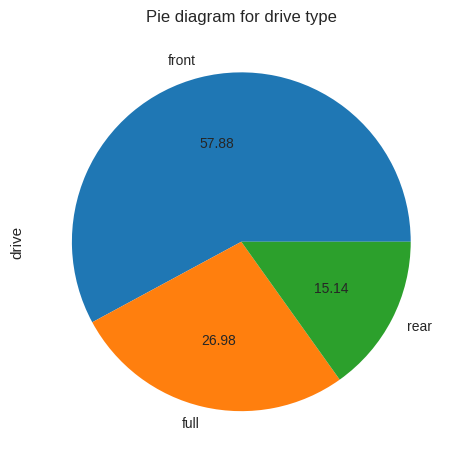

In [0]:
sales['drive'].value_counts().plot.pie(autopct='%.2f')
sns.plt.title("Pie diagram for drive type")

We can say that the most sold cars in front drive type, in terms of percentage we can say that, approx 58% of total cars sold in front drive type, 27% in full drive type and 15% in rear drive type.



<a id=section404></a>
##4.4 Which body and drive type are sold most?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


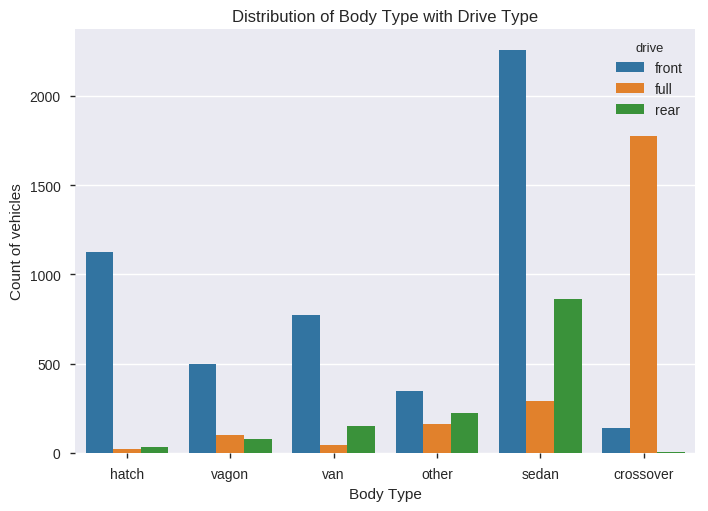

In [0]:
sns.countplot(x='body',data=sales, hue='drive')
sns.plt.title("Distribution of Body Type with Drive Type")
sns.plt.xlabel('Body Type')
sns.plt.ylabel('Count of vehicles');


*   "**Front**" wheel drive cars are the top most cars in all body type except in "**Crossover**" body type.
*   In "**Crossover**" body type "**Full**" wheel drive cars are leading.


<a id=section405></a>
##4.5 Which price group are having more demand?

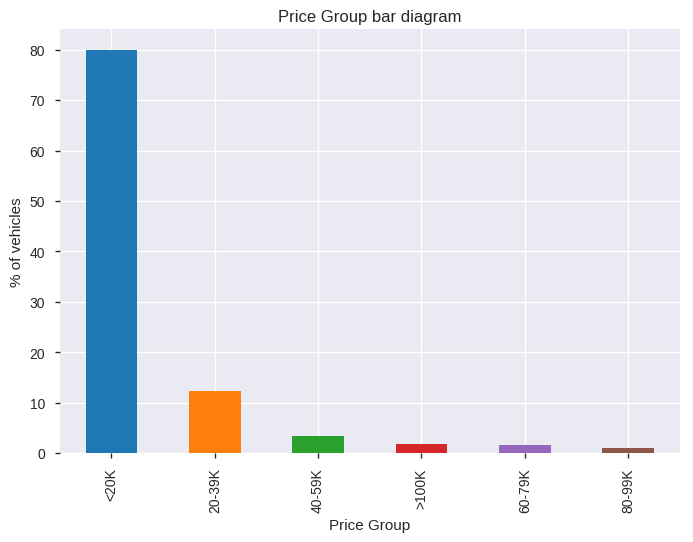

In [0]:
sales['price_group'] = pd.cut(sales['price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
sales['price_group'] = sales['price_group'].astype(object)
(sales['price_group'].value_counts() / len(sales) *100).plot.bar()
sns.plt.title("Price Group bar diagram")
sns.plt.ylabel('% of vehicles')
sns.plt.xlabel('Price Group');

From the above bar plot, we can say that approx 80% of cars are sold at price range of "<20K"

<a id=section406></a>
##4.6 How the body of the car and price related to each other?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'Price Group')

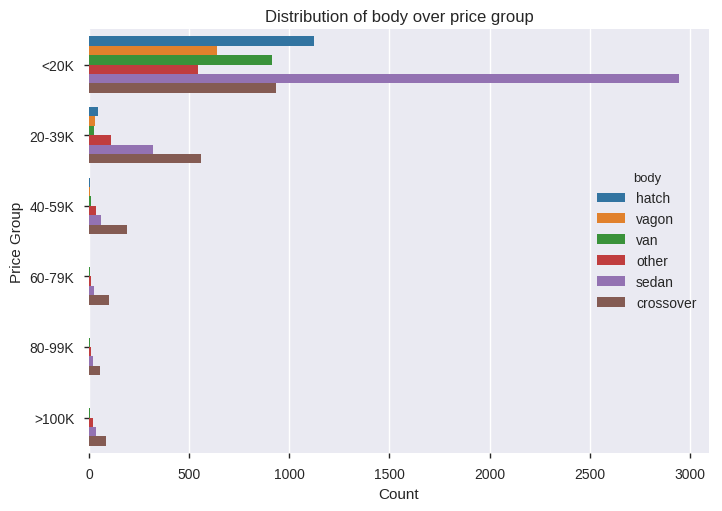

In [0]:
sns.countplot(y='price_group',hue="body",data=sales, order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])
sns.plt.title("Distribution of body over price group")
sns.plt.xlabel("Count")
sns.plt.ylabel("Price Group")

*   We can say that most of the saled cars are **"<20K"** price group.
*  Body type  **"Sedan"** will be the highly saled in all the car brands under "**<20K**" price group.

<a id=section407></a>
##4.7 Does the cars have registered?

In [0]:
#registList = sales[sales['registration'] == "no"].count()
#registList
#sns.distplot(registList,kde=False)
sales['registration'].value_counts()

yes    8361
no      519
Name: registration, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Distribution of Registration')

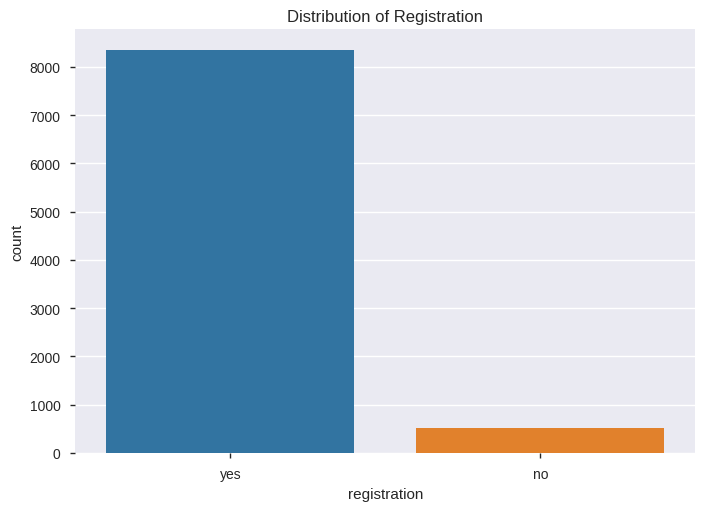

In [0]:
sns.countplot(sales['registration'])
sns.plt.title("Distribution of Registration")



*   From this chart, we can say more than 90% of the cars are registered.



In [0]:
len(sales['car'].unique())

83

In [0]:
carlist = sales['car'].value_counts().head(10).index.tolist()
carlist

['Volkswagen',
 'Mercedes-Benz',
 'BMW',
 'Toyota',
 'Renault',
 'VAZ',
 'Audi',
 'Opel',
 'Skoda',
 'Hyundai']




*   Dataset has around 83 unique car brands.
*   For better understanding of data, considering top 10 sale cars for further analysis.





<a id=section408></a>
##4.8 How does top 10 cars relate to registration?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(14.44974247685184, 0.5, 'Count')

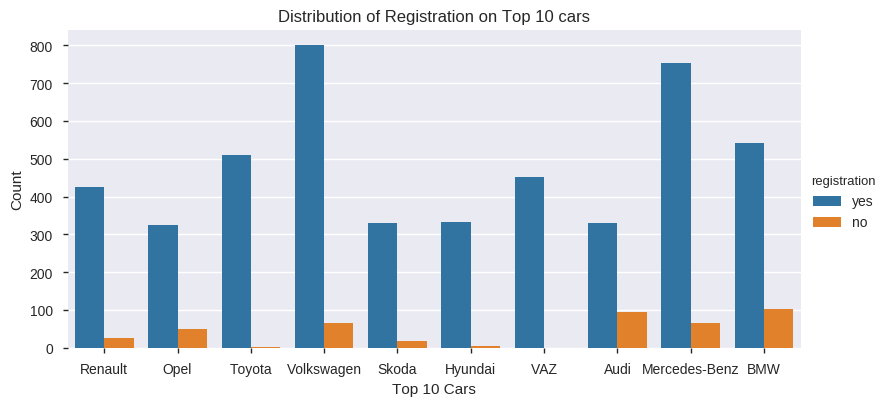

In [0]:
TopCars = sales[sales['car'].isin(carlist)]
sns.factorplot(x='car',data=TopCars, hue='registration', hue_order=['yes','no'], kind='count',size=4,aspect=2)
sns.plt.title("Distribution of Registration on Top 10 cars")
sns.plt.xlabel("Top 10 Cars")
sns.plt.ylabel("Count")



*   Vokswagen is most sold cars in all the price ranges which is approx 800+.
*   We can say, some cars are not registered yet.



<a id=section409></a>
## 4.9 How does year relate to registration of cars?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'Registration over years')

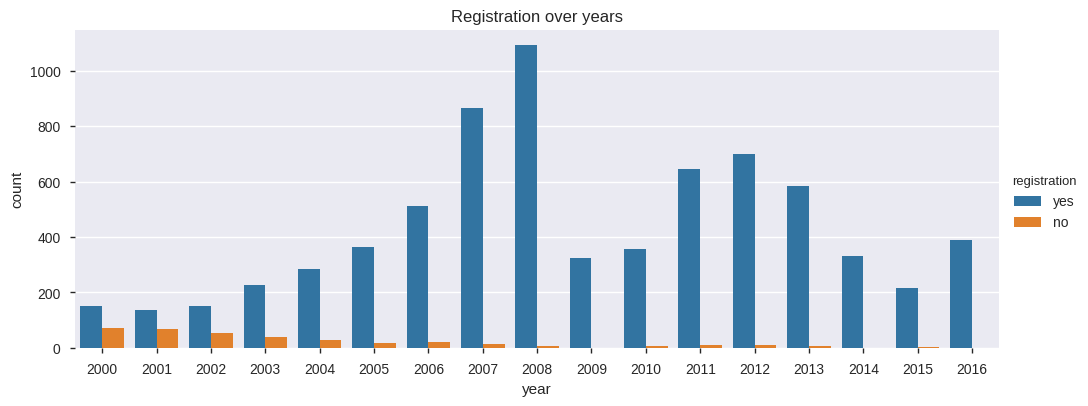

In [0]:
regisYeardf = sales.loc[sales['year'] >= 2000]

sns.factorplot('year',data=regisYeardf,aspect=2.5, kind='count',hue='registration')
sns.plt.title("Registration over years")

By this chart we can say that majority of the cars sold in year 2008

<a id=section410></a>
##4.10 How the price and mileage related to each other?

Text(43.46272530864198, 0.5, 'Price')

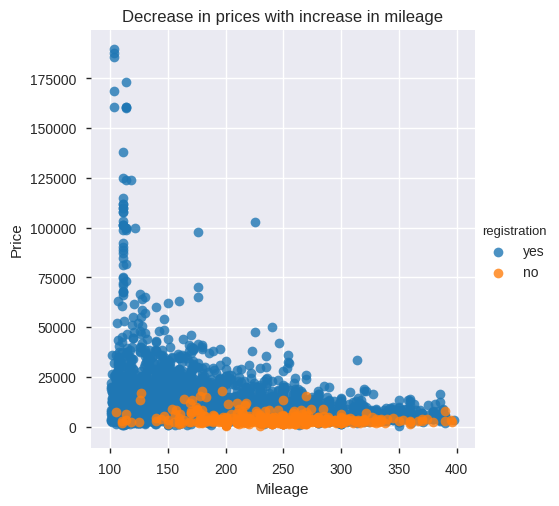

In [0]:
cardf = sales[sales['car'].isin(carlist)]
#registereddf = cardf[cardf['registration'] == "yes"]
#registereddf
df = cardf[(cardf['mileage'] > 100) & (cardf['mileage'] < 400)]
sns.lmplot('mileage','price',data=df,hue='registration',fit_reg=False)
sns.plt.title("Decrease in prices with increase in mileage")
sns.plt.xlabel("Mileage")
sns.plt.ylabel("Price")

#sns.swarmplot('mileage','price',hue='registration',data=cardf,split=True)

From the chart,



*   When mileage increases, price of the cars decreases.
*   Most of the cars mileage is in between 100 to 400, For clear understanding we have taken the x-axis scale from 100 to 400.


*   Here, price and mileage have strogly negative correlation in sold car dataset , i.e. lower price segment has higher mileage and higher price segment has lower mileage.






<a id=section411></a>
##4.11 How does top 10 car sales relate to engine type?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(15.311234809027768, 0.5, 'Count')

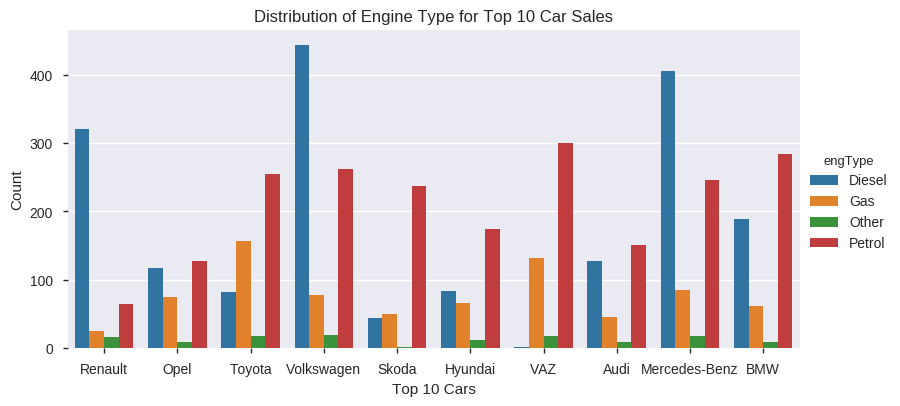

In [0]:
#cardf = sales[sales['car'].isin(carlist)]
registereddf = cardf[cardf['registration'] == "yes"]
sns.factorplot('car',data=registereddf,hue='engType',kind='count',size=4,aspect=2)
sns.plt.title("Distribution of Engine Type for Top 10 Car Sales")
sns.plt.xlabel("Top 10 Cars")
sns.plt.ylabel("Count")


From the chart,



*   Diesel type cars are highly sold in "**volkswagen**", "**Mercedes-Benz**", "**Renault**".
*   In other car brands, we can say Petrol type is higly sold.


*   Most of the cars sales are in approx range of 1 to 300 for every individual engine type.





<a id=section412></a>
##4.12 What is the rate of increase in car sales over years with engine type?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


Text(36.07256221064816, 0.5, 'Price')

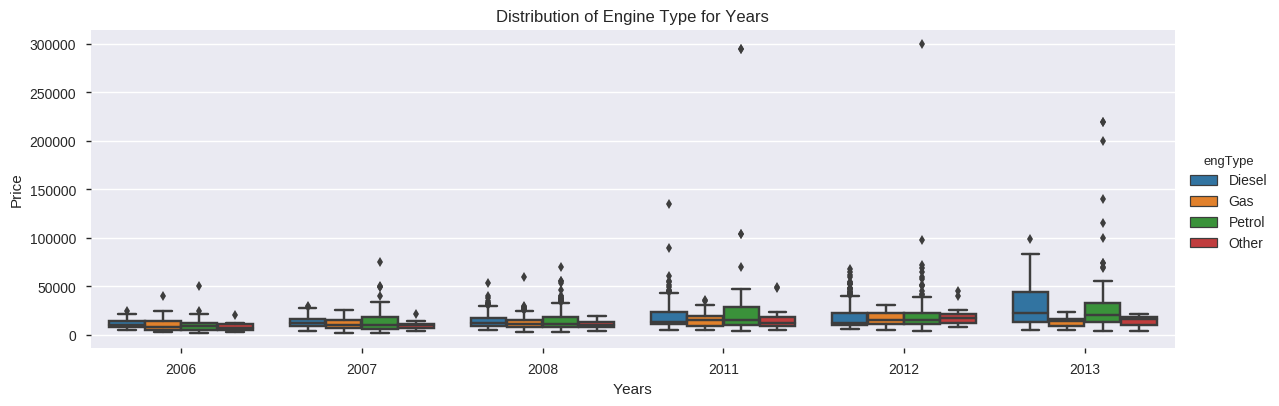

In [0]:
#df.groupby(['car','engType']).count()
yearList = registereddf['year'].value_counts().head(6).index.tolist()
yeardf = registereddf[cardf['year'].isin(yearList)]
sns.factorplot('year','price',data=yeardf,hue='engType',kind='box',size=4,aspect=3)
sns.plt.title("Distribution of Engine Type for Years")
sns.plt.xlabel("Years")
sns.plt.ylabel("Price")

From the chart,

* Sales of cars increasing every year from 2006 to 2013.

* There is increasing trend in sales of Diesel fuel type from 2006 to 2013 which says diesel cars are having high demand.
* There are prices more than 200000 dollars in petrol fule type, which are high end cars.

In [0]:
def numericDrive(df):
    repValue = 0;
    for item,row in df.iterrows():
        if(row['drive'] == "full"):
            repValue = 3
        elif(row['drive'] == "rear"):
            repValue = 2
        elif(row['drive'] == "front"):
            repValue = 1
        else:
            repValue = 0
        
        df.set_value(item,'numDrive',repValue)
        
numericDrive(registereddf)
registereddf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,engV,engType,drive,car,body,year,price,mileage,registration,model,price_group,numDrive
4,1.0,Diesel,front,Renault,van,2013,7600.0,108.000,yes,Kangoo ãðóç.,<20K,1.0
5,1.0,Gas,front,Opel,hatch,1990,3100.0,245.000,yes,Corsa,<20K,1.0
6,1.0,Gas,front,Opel,hatch,2000,2754.0,297.000,yes,Corsa,<20K,1.0
7,1.0,Gas,front,Opel,vagon,2001,3799.0,251.000,yes,Agila,<20K,1.0
9,1.0,Gas,front,Toyota,hatch,2011,7900.0,56.000,yes,Aygo,<20K,1.0
14,1.0,Other,front,Volkswagen,van,2004,7000.0,350.000,yes,T5 (Transporter) ãðóç,<20K,1.0
66,1.0,Petrol,front,Opel,hatch,2000,3800.0,169.000,yes,Corsa,<20K,1.0
67,1.0,Petrol,front,Opel,hatch,2002,4399.0,177.000,yes,Corsa,<20K,1.0
79,1.0,Petrol,front,Skoda,hatch,2015,11485.5,1.000,yes,Fabia,<20K,1.0
80,1.0,Petrol,front,Toyota,hatch,1999,3900.0,160.000,yes,Yaris,<20K,1.0


<a id=section413></a>
##4.13 How is the relationship between different variants of data?

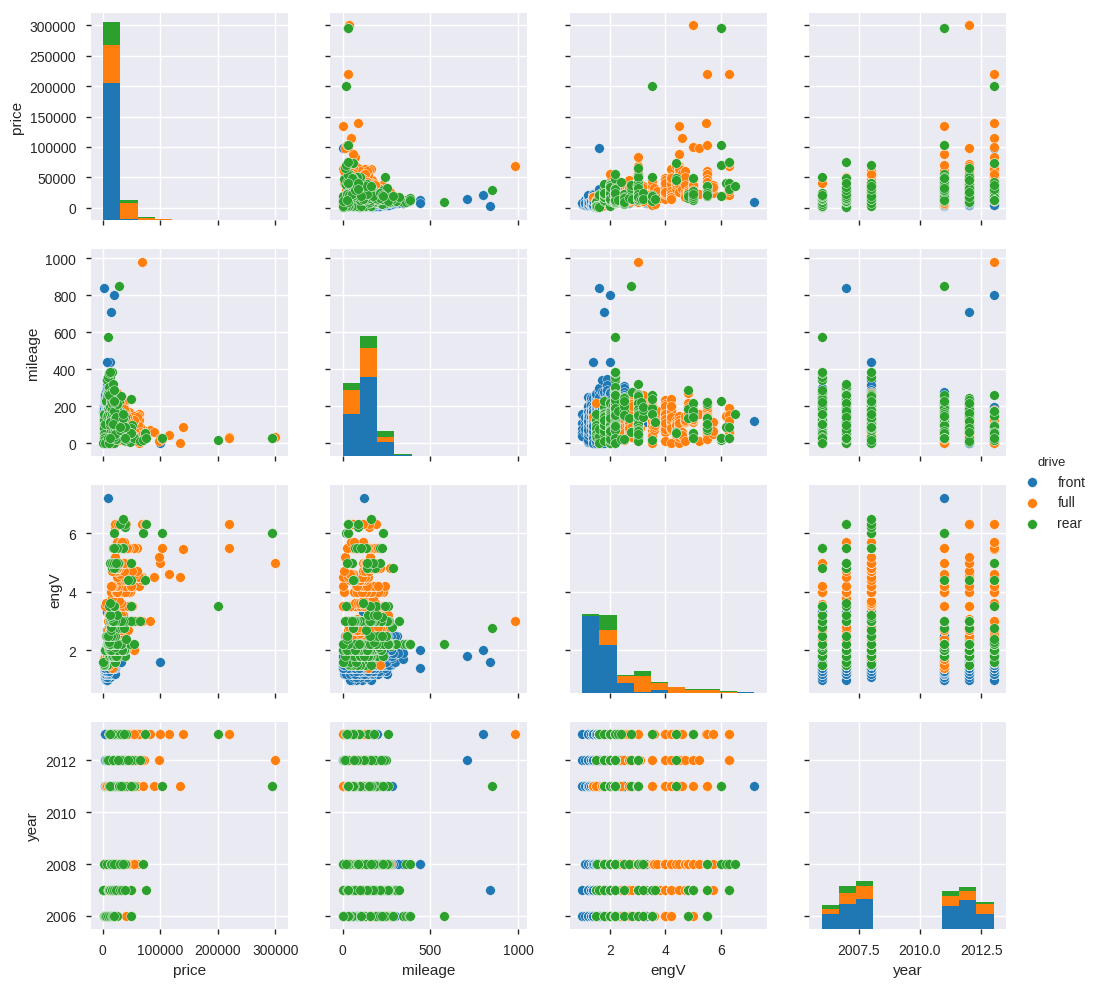

In [0]:
sns.pairplot(yeardf[['price','mileage','engV','drive','year']],vars=['price','mileage','engV','year'],hue="drive")

From the chart,



*   **Price** and** year** plot, we can say car prices are increasing every year. Because, car sales are increasing and high end cars like "Mercedez" and "BMW" releasing luxury cars every year.
*   Increase in Mileage depreciates the car price from "**price**" and "**mileage**" plot.


*   **mileage** and **engV** plot, we can say most of the cars sold with engine volume in between  1.5CC to 2.5CC.
*   **engine volume** (engV) and **price** plot, it clearly says that high end cars having more engine volume.






<a id=section414></a>
##4.14 Correlation between all the features in heat map?

Text(0.5, 1.0, 'Correlation between different variables')

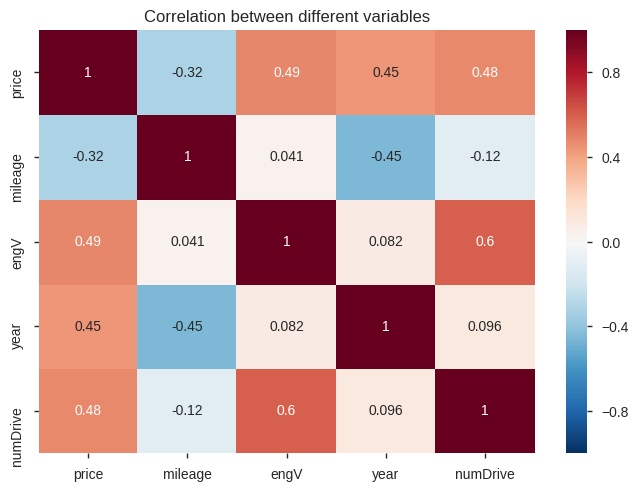

In [0]:
heatCar = (registereddf.loc[:,['price','mileage','engV','year','numDrive']]).corr()
sns.heatmap(heatCar,annot=True)
sns.plt.title("Correlation between different variables")

From the correlation chart,



*   "**Drive**" and "engV" are **strongly correlated **compared to other variables of car sales dataset.
*   Where as, "**mileage**" and "price" are **strongly negative correlated**.i.e. lower price cars have higher mileage and higher price cars have lower mileage.



*   **Year** and **price** are also positve correlated after "**Drive**" and "**engV**". Latest production cars have higher price.
*   **engine volume (engV)** and **mileage** also have some **mild positive correlation**. In our data most of the cars have engine volume in between 1.5 CC to 2.5 CC, due to that mileage and engine volume have mild positive correlation.


*   **engine volume** (engV) and **year** also have some **mild positive correlation**.








<a id=section5></a>
##5. Hypothisis : Sales for diesel varainat cars likely to increase every year?



On studying questionaries **4.9, 4.11, 4.12**, we can conclude that car sales are increasing every year for fuel type "**Diesel**".


*  Most of the people are interested to buy diesel cars.
*  By proliferate diesel cars production will increase the revenue of the company.



<a id=section6></a>
#6. Conclusion



*   In this dataset we have total 9463 records excluding duplicates.
*   We observe that out of total cars sold, majority of the cars sold by "**Volkswagen**", "**Mercedes-Benz**" and "**BMW**" brand.
*  "**Front**" wheel drive cars are the top most cars in all body type except in "Crossover" body type. In "Crossover" body type "Full" wheel drive cars are leading.
*  Mostly sold body types are "**crossover**", "**hatch**" and "**Sedan**"
*  80% of the cars sold in range 200 to 20000 with body type "**Sedan**". Because it is the most affordable car for middle class people.
*  We can say more than 90% of the cars are registered.
*  We can say that the most sold cars in front drive type, in terms of percentage we can say that, approx **58%** of total cars sold in front drive type, **27%** in full drive type and **15%** in rear drive type.
*  Majority of the cars with year 2008 are registered.
*  Sales of cars increasing every year from 2006 to 2013.
*  **Drive** is strongly correlated with "**engV**".
*  "**mileage**" and "**price**" are strongly negative correlated.i.e. lower price cars have higher mileage and higher price cars have lower mileage.
*  **mileage** and **engV** plot, we can say most of the cars sold with engine volume in between 1.5CC to 2.5CC.



# New Section